# Movie Recommender System - Phase 2: Exploratory Data Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Load processed data
df = pd.read_csv('../data/processed/movies_processed.csv')
df['genres'] = df['genres'].apply(eval)
df['keywords'] = df['keywords'].apply(eval)
df['cast'] = df['cast'].apply(eval)

# 1. DISTRIBUTION ANALYSIS



[1] Distribution Analysis
Saved: eda_distributions.png


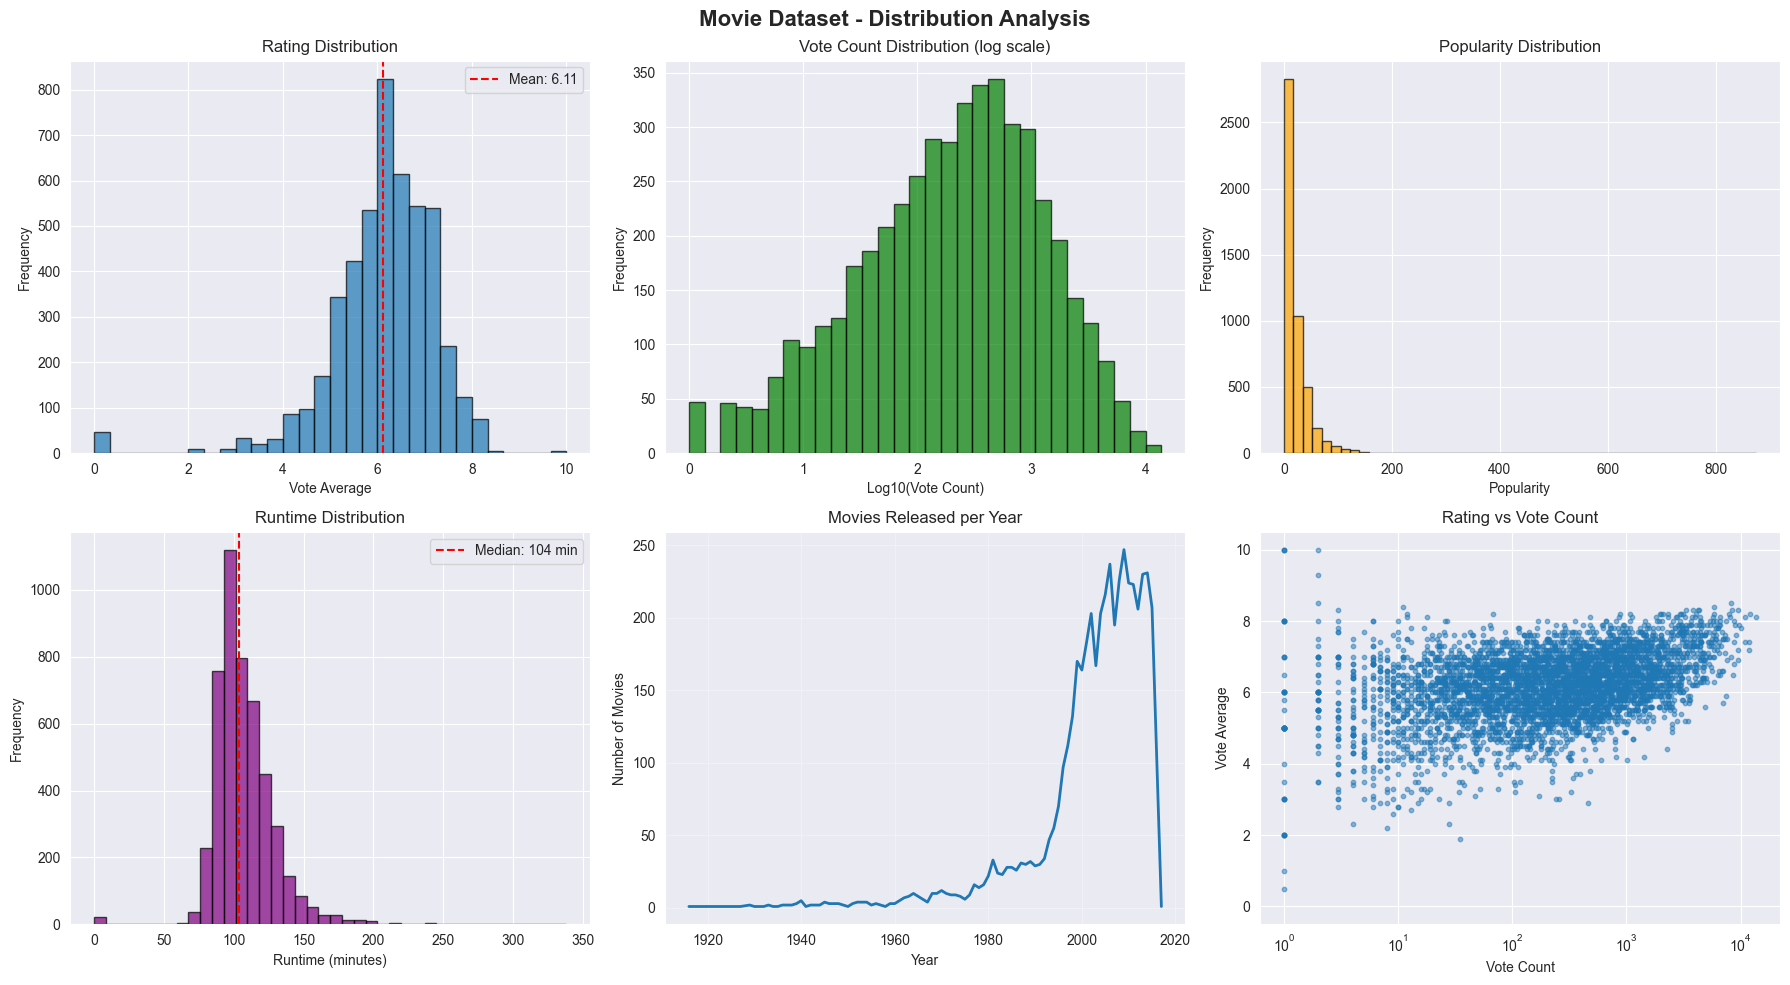

In [3]:
print("\n[1] Distribution Analysis")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Movie Dataset - Distribution Analysis', fontsize=16, fontweight='bold')

# 1.1 Rating Distribution
axes[0, 0].hist(df['vote_average'], bins=30, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Rating Distribution')
axes[0, 0].set_xlabel('Vote Average')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['vote_average'].mean(), color='red',
                    linestyle='--', label=f'Mean: {df["vote_average"].mean():.2f}')
axes[0, 0].legend()

# 1.2 Vote Count Distribution (log scale)
axes[0, 1].hist(np.log10(df['vote_count'] + 1), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Vote Count Distribution (log scale)')
axes[0, 1].set_xlabel('Log10(Vote Count)')
axes[0, 1].set_ylabel('Frequency')

# 1.3 Popularity Distribution
axes[0, 2].hist(df['popularity'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Popularity Distribution')
axes[0, 2].set_xlabel('Popularity')
axes[0, 2].set_ylabel('Frequency')

# 1.4 Runtime Distribution
axes[1, 0].hist(df['runtime'].dropna(), bins=40, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('Runtime Distribution')
axes[1, 0].set_xlabel('Runtime (minutes)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].axvline(df['runtime'].median(), color='red',
                    linestyle='--', label=f'Median: {df["runtime"].median():.0f} min')
axes[1, 0].legend()

# 1.5 Movies per Year
movies_per_year = df.groupby('release_year').size()
axes[1, 1].plot(movies_per_year.index, movies_per_year.values, linewidth=2)
axes[1, 1].set_title('Movies Released per Year')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Number of Movies')
axes[1, 1].grid(True, alpha=0.3)

# 1.6 Rating vs Vote Count
axes[1, 2].scatter(df['vote_count'], df['vote_average'], alpha=0.5, s=10)
axes[1, 2].set_title('Rating vs Vote Count')
axes[1, 2].set_xlabel('Vote Count')
axes[1, 2].set_ylabel('Vote Average')
axes[1, 2].set_xscale('log')

plt.tight_layout()
plt.savefig('../results/figures/eda/eda_distributions.png', dpi=300, bbox_inches='tight')
print("Saved: eda_distributions.png")

# 2. GENRE ANALYSIS



[2] Genre Analysis
Saved: eda_genres.png


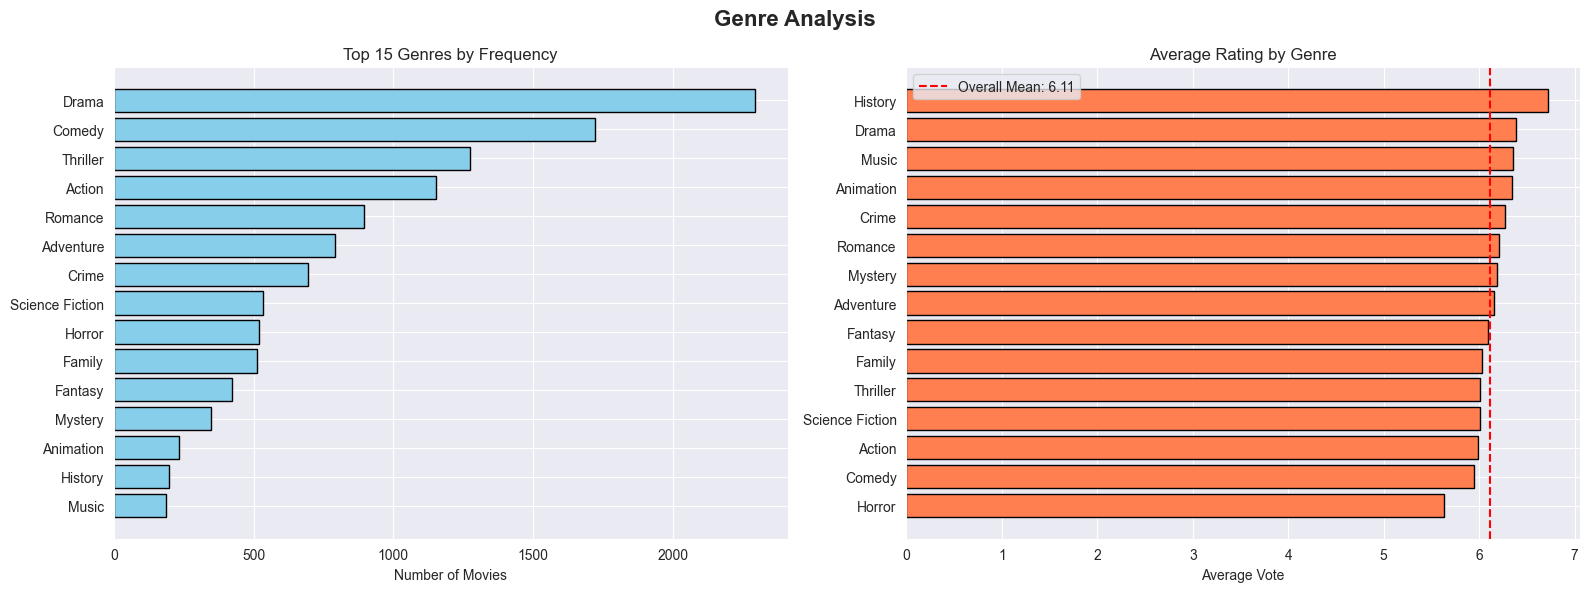

In [4]:
print("\n[2] Genre Analysis")

# Count genres
all_genres = [genre for genres in df['genres'] for genre in genres]
genre_counts = Counter(all_genres)
top_genres = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)[:15])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Genre Analysis', fontsize=16, fontweight='bold')

# 2.1 Top Genres Bar Chart
axes[0].barh(list(top_genres.keys()), list(top_genres.values()), color='skyblue', edgecolor='black')
axes[0].set_title('Top 15 Genres by Frequency')
axes[0].set_xlabel('Number of Movies')
axes[0].invert_yaxis()

# 2.2 Average Rating by Genre
genre_ratings = {}
for genre in top_genres.keys():
    mask = df['genres'].apply(lambda x: genre in x)
    genre_ratings[genre] = df[mask]['vote_average'].mean()

sorted_ratings = dict(sorted(genre_ratings.items(), key=lambda x: x[1], reverse=True))
axes[1].barh(list(sorted_ratings.keys()), list(sorted_ratings.values()),
             color='coral', edgecolor='black')
axes[1].set_title('Average Rating by Genre')
axes[1].set_xlabel('Average Vote')
axes[1].invert_yaxis()
axes[1].axvline(df['vote_average'].mean(), color='red', linestyle='--',
                label=f'Overall Mean: {df["vote_average"].mean():.2f}')
axes[1].legend()

plt.tight_layout()
plt.savefig('../results/figures/eda/eda_genres.png', dpi=300, bbox_inches='tight')
print("Saved: eda_genres.png")

# 3. TEMPORAL ANALYSIS



[3] Temporal Analysis
Saved: eda_temporal.png


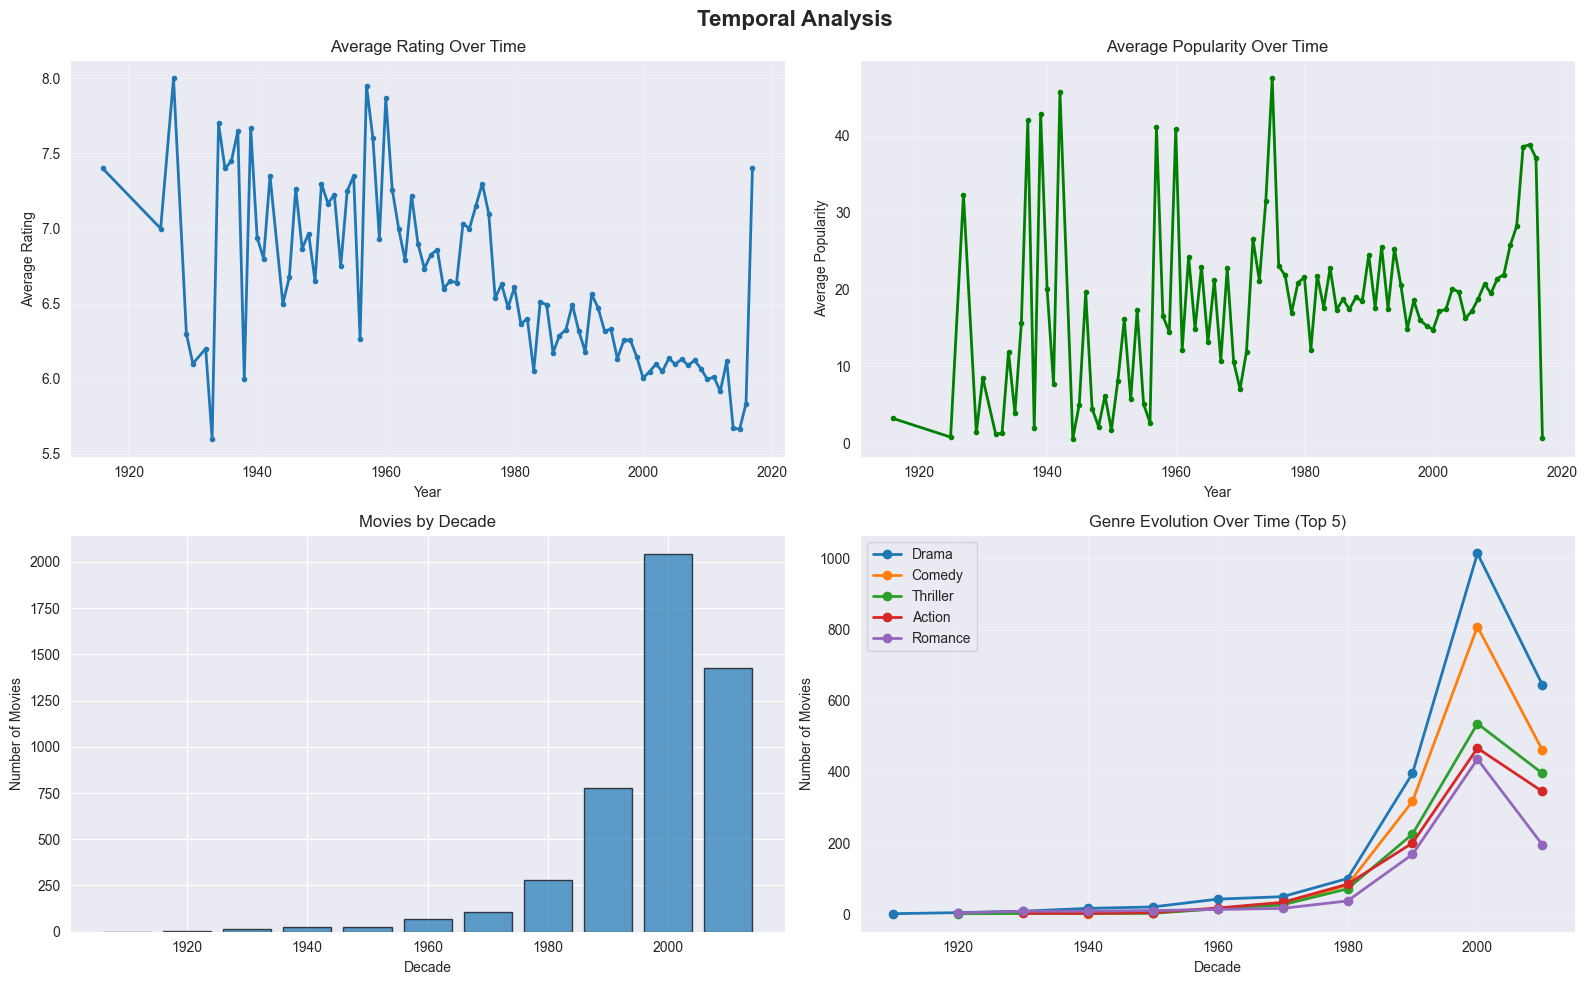

In [5]:
print("\n[3] Temporal Analysis")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal Analysis', fontsize=16, fontweight='bold')

# 3.1 Average Rating Over Time
yearly_ratings = df.groupby('release_year')['vote_average'].mean()
axes[0, 0].plot(yearly_ratings.index, yearly_ratings.values, linewidth=2, marker='o', markersize=3)
axes[0, 0].set_title('Average Rating Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average Rating')
axes[0, 0].grid(True, alpha=0.3)

# 3.2 Average Popularity Over Time
yearly_popularity = df.groupby('release_year')['popularity'].mean()
axes[0, 1].plot(yearly_popularity.index, yearly_popularity.values,
                linewidth=2, color='green', marker='o', markersize=3)
axes[0, 1].set_title('Average Popularity Over Time')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Popularity')
axes[0, 1].grid(True, alpha=0.3)

# 3.3 Movies by Decade
decade_counts = df['decade'].value_counts().sort_index()
axes[1, 0].bar(decade_counts.index, decade_counts.values,
               width=8, edgecolor='black', alpha=0.7)
axes[1, 0].set_title('Movies by Decade')
axes[1, 0].set_xlabel('Decade')
axes[1, 0].set_ylabel('Number of Movies')

# 3.4 Genre Evolution (Top 5 genres over time)
top_5_genres = list(top_genres.keys())[:5]
for genre in top_5_genres:
    mask = df['genres'].apply(lambda x: genre in x)
    genre_by_decade = df[mask].groupby('decade').size()
    axes[1, 1].plot(genre_by_decade.index, genre_by_decade.values,
                    marker='o', label=genre, linewidth=2)

axes[1, 1].set_title('Genre Evolution Over Time (Top 5)')
axes[1, 1].set_xlabel('Decade')
axes[1, 1].set_ylabel('Number of Movies')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/figures/eda/eda_temporal.png', dpi=300, bbox_inches='tight')
print("Saved: eda_temporal.png")

# 4. CORRELATION ANALYSIS



[4] Correlation Analysis
Saved: eda_correlation.png


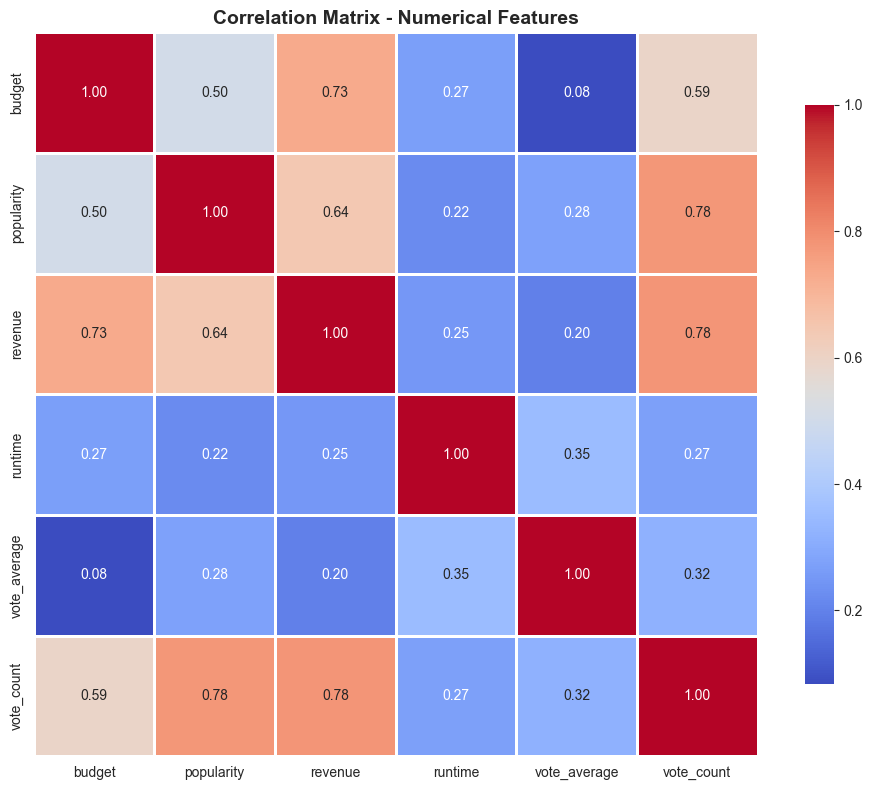

In [6]:
print("\n[4] Correlation Analysis")

# Select numerical features
numerical_features = ['budget', 'popularity', 'revenue', 'runtime',
                     'vote_average', 'vote_count']
corr_data = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../results/figures/eda/eda_correlation.png', dpi=300, bbox_inches='tight')
print("Saved: eda_correlation.png")

# 5. TOP MOVIES ANALYSIS


In [7]:
print("\n[5] Top Movies Analysis")

# Create weighted rating (IMDB formula)
C = df['vote_average'].mean()
m = df['vote_count'].quantile(0.90)
df['weighted_rating'] = (df['vote_count'] / (df['vote_count'] + m) * df['vote_average'] +
                         m / (df['vote_count'] + m) * C)

# Get top movies
top_movies = df.nlargest(20, 'weighted_rating')[['title', 'vote_average',
                                                   'vote_count', 'weighted_rating',
                                                   'release_year', 'genres']]

print("\nTop 20 Movies by Weighted Rating:")
print(top_movies.to_string(index=False))


[5] Top Movies Analysis

Top 20 Movies by Weighted Rating:
                                            title  vote_average  vote_count  weighted_rating  release_year                                                  genres
                         The Shawshank Redemption           8.5        8205         8.058920        1994.0                                          [Drama, Crime]
                                       Fight Club           8.3        9413         7.939202        1999.0                                                 [Drama]
                                  The Dark Knight           8.2       12002         7.920009        2008.0                        [Drama, Action, Crime, Thriller]
                                     Pulp Fiction           8.3        8428         7.904664        1994.0                                       [Thriller, Crime]
                                        Inception           8.1       13752         7.863314        2010.0 [Action, Thriller,

# 6. STATISTICAL SUMMARY


In [9]:
print("\n[6] Statistical Summary")
print("=" * 60)

print(f"\nDataset Size: {len(df)} movies")
print(f"\nRating Statistics:")
print(f"  Mean: {df['vote_average'].mean():.2f}")
print(f"  Median: {df['vote_average'].median():.2f}")
print(f"  Std: {df['vote_average'].std():.2f}")
print(f"  Min: {df['vote_average'].min():.2f}")
print(f"  Max: {df['vote_average'].max():.2f}")

print(f"\nVote Count Statistics:")
print(f"  Mean: {df['vote_count'].mean():.0f}")
print(f"  Median: {df['vote_count'].median():.0f}")
print(f"  Min: {df['vote_count'].min():.0f}")
print(f"  Max: {df['vote_count'].max():.0f}")

print(f"\nGenre Statistics:")
print(f"  Total unique genres: {len(genre_counts)}")
print(f"  Most common: {list(top_genres.keys())[0]} ({list(top_genres.values())[0]} movies)")
print(f"  Average genres per movie: {df['genres'].apply(len).mean():.2f}")

print(f"\nTemporal Statistics:")
print(f"  Year range: {df['release_year'].min():.0f} - {df['release_year'].max():.0f}")
print(f"  Most productive year: {df['release_year'].value_counts().index[0]:.0f} ({df['release_year'].value_counts().values[0]} movies)")

print("\n" + "=" * 60)
print("EDA COMPLETED!")
print("=" * 60)


[6] Statistical Summary

Dataset Size: 4772 movies

Rating Statistics:
  Mean: 6.11
  Median: 6.20
  Std: 1.14
  Min: 0.00
  Max: 10.00

Vote Count Statistics:
  Mean: 695
  Median: 238
  Min: 0
  Max: 13752

Genre Statistics:
  Total unique genres: 20
  Most common: Drama (2296 movies)
  Average genres per movie: 2.55

Temporal Statistics:
  Year range: 1916 - 2017
  Most productive year: 2009 (247 movies)

EDA COMPLETED!
